In [15]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
train_images = train_images/255
test_images = test_images/255

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5008 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3396 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3163 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8902


# 컨볼루션 신경망 이용


In [12]:
import matplotlib.pyplot as plt

In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images/255
test_images = test_images/255

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))

In [18]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [26]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.23760, saving model to ./model/01-0.2376.hdf5

Epoch 2: val_loss did not improve from 0.23760

Epoch 3: val_loss did not improve from 0.23760

Epoch 4: val_loss did not improve from 0.23760

Epoch 5: val_loss did not improve from 0.23760

Epoch 6: val_loss did not improve from 0.23760

Epoch 7: val_loss did not improve from 0.23760

Epoch 8: val_loss did not improve from 0.23760

Epoch 9: val_loss did not improve from 0.23760

Epoch 10: val_loss did not improve from 0.23760

Epoch 11: val_loss did not improve from 0.23760


In [27]:
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

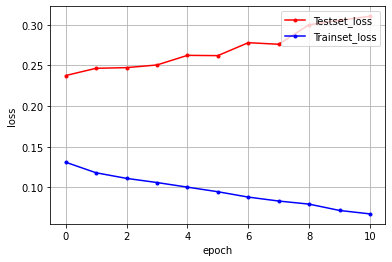

In [28]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()